In [1]:
# Imports for EDA
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive
import itertools
import hashlib
from scipy.stats import poisson, norm, gamma, zscore
#!pip install pymc3
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#import bambi as bmb # was not used?
sns.set(style="dark")
plt.style.use("ggplot")

try:
    from pymc3 import *
    import pymc3 as pm
except:
    ! pip install pymc3
    from pymc3 import *
    import pymc3 as pm

import arviz as az

# Bureau of Transportation Statistics: Monthly Transportation Statistics

In [2]:
# Bureau of Transportation Statistics: Monthly Transportation Statistics
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
df_mts.head(10)

,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,01/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,07/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,08/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/01/1947 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#for column in df.columns:
#    print(column)

df_mts.columns
# Notable columns:
# - Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - Highway Fatalities
# - Highway Vehicle Miles Traveled - All Systems
# - State and Local Government Construction Spending - Pavement
# - State and Local Government Construction Spending - Transportation
# - State and Local Government Construction Spending - Infrastructure
# - State and Local Government Construction Spending - Automotive
# - National Highway Construction Cost Index (NHCCI)
# - Highway Fuel Price - On-highway Diesel
# - Highway Fuel Price - Regular Gasoline
# - Unemployment Rate - Seasonally Adjusted
# - Labor Force Particpation - Seasonally Adjusted
# - Unemployed - Seasonally Adjusted
# - Heavy truck sales
# - Light truck sales
# - Auto sales
# - Auto sales SAAR (millions)
# 

Index(['Date', 'Air Safety - General Aviation Fatalities',
       'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities',
       'U.S. Airline Traffic - Total - Seasonally Adjusted',
       'U.S. Airline Traffic - International - Seasonally Adjusted',
       'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
       'Transit Ridership - Other Transit Modes - Adjusted',
       'Transit Ridership - Fixed Route Bus - Adjusted',
       'Transit Ridership - Urban Rail - Adjusted',
       ...
       'Heavy truck sales SAAR (millions)',
       'U.S. Airline Traffic - Total - Non Seasonally Adjusted',
       'Light truck sales SAAR (millions)',
       'U.S. Airline Traffic - International - Non Seasonally Adjusted',
       'Auto sales SAAR (millions)',
       'U.S. Airline Traffic - Domestic - Non Seasonally Adjusted',
       'Transborder - Total North American Freight',
       'Transborder - U.S. - Mexico Freight',
       'U.S. marketing air carriers on-

# Google: Daily Community Mobility Data

In [4]:
# Google: Daily Community Mobility Data
df_camr = pd.read_csv('CA_mobility_report.csv')
df_camr

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-15,4.0,2.0,10.0,3.0,1.0,0.0
1,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-16,13.0,8.0,41.0,4.0,0.0,-2.0
2,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-17,-12.0,-15.0,63.0,-28.0,-52.0,11.0
3,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-18,-1.0,4.0,6.0,-1.0,-1.0,1.0
4,CA,Canada,NaN,NaN,NaN,NaN,NaN,ChIJ2WrMN9MDDUsRpY9Doiq3aJk,2020-02-19,1.0,1.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76898,CA,Canada,Yukon,NaN,NaN,CA-YT,NaN,ChIJiYtStJiBF1ER6pbMYdWcFC4,2020-12-26,-52.0,NaN,NaN,NaN,-31.0,NaN
76899,CA,Canada,Yukon,NaN,NaN,CA-YT,NaN,ChIJiYtStJiBF1ER6pbMYdWcFC4,2020-12-28,-42.0,NaN,NaN,NaN,-62.0,NaN
76900,CA,Canada,Yukon,NaN,NaN,CA-YT,NaN,ChIJiYtStJiBF1ER6pbMYdWcFC4,2020-12-29,-37.0,NaN,NaN,NaN,-46.0,NaN
76901,CA,Canada,Yukon,NaN,NaN,CA-YT,NaN,ChIJiYtStJiBF1ER6pbMYdWcFC4,2020-12-30,-31.0,NaN,NaN,NaN,-44.0,NaN


In [5]:
for column in df_camr.columns:
    print(column)
# Notable columns:
# - transit_stations_percent_change_from_baseline
# - parks_percent_change_from_baseline
# - workpalces_percent_change_from_baseline
# - residential_percent_change_from_baseline

country_region_code
country_region
sub_region_1
sub_region_2
metro_area
iso_3166_2_code
census_fips_code
place_id
date
retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


# Supplementary Data Sets

## [U.S. GDP 1960-2022](https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product)

In [6]:
# US GDP 1960-2022
# Acquired from: https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
df_gdp = pd.read_csv('usa_gdp_annual.csv')
df_gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,1960-12-31,543.300000,3007.1234,NaN
1,1961-12-31,563.300000,3066.5629,2.3000
2,1962-12-31,605.100000,3243.8431,6.1000
3,1963-12-31,638.600000,3374.5152,4.4000
4,1964-12-31,685.800000,3573.9412,5.8000
...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557
58,2018-12-31,20527.156026,62805.2538,2.9189
59,2019-12-31,21372.572437,65094.7994,2.2889
60,2020-12-31,20893.743833,63027.6795,-3.4046


# Begin EDA
## EDA Visualization 1

In [7]:
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
# Determine column indices so that we can extract the columns we want
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)
# Notable columns:
# - 2 Highway Fatalities Per 100 Million Vehicle Miles Traveled
# - 3 Highway Fatalities
# - 12 Highway Vehicle Miles Traveled - All Systems
### NOTE Total already exists: 82
# - 34 State and Local Government Construction Spending - Pavement
# - 45 State and Local Government Construction Spending - Transportation
# - 61 State and Local Government Construction Spending - Infrastructure
# - 76 State and Local Government Construction Spending - Automotive
# - 83 National Highway Construction Cost Index (NHCCI)
# - 84 Highway Fuel Price - On-highway Diesel
# - 85 Highway Fuel Price - Regular Gasoline
# - 95 Unemployment Rate - Seasonally Adjusted
# - 96 Labor Force Particpation - Seasonally Adjusted
# - 97 Unemployed - Seasonally Adjusted
# - 117 Heavy truck sales
# - 119 Light truck sales
# - 120 Auto sales
# - 129 Auto sales SAAR (millions)
# - 135 year ### ADDED

0 : Date
1 : Air Safety - General Aviation Fatalities
2 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
3 : Highway Fatalities
4 : U.S. Airline Traffic - Total - Seasonally Adjusted
5 : U.S. Airline Traffic - International - Seasonally Adjusted
6 : U.S. Airline Traffic - Domestic - Seasonally Adjusted
7 : Transit Ridership - Other Transit Modes - Adjusted
8 : Transit Ridership - Fixed Route Bus - Adjusted
9 : Transit Ridership - Urban Rail - Adjusted
10 : Freight Rail Intermodal Units
11 : Freight Rail Carloads
12 : Highway Vehicle Miles Traveled - All Systems
13 : Highway Vehicle Miles Traveled - Total Rural
14 : Highway Vehicle Miles Traveled - Other Rural
15 : Highway Vehicle Miles Traveled - Rural Other Arterial
16 : Highway Vehicle Miles Traveled - Rural Interstate
17 : State and Local Government Construction Spending - Breakwater/Jetty
18 : State and Local Government Construction Spending - Dam/Levee
19 : State and Local Government Construction Spending - Conservation

Highway Fatalities Per 100 Million Vehicle Miles Traveled            0.789091
Highway Fatalities                                                   0.800000
Highway Vehicle Miles Traveled - All Systems                         0.818182
State and Local Government Construction Spending - Pavement          0.007273
State and Local Government Construction Spending - Transportation    0.007273
State and Local Government Construction Spending - Infrastructure    0.007273
State and Local Government Construction Spending - Automotive        0.007273
State and Local Government Construction Spending - Total             0.007273
National Highway Construction Cost Index (NHCCI)                     0.738182
Highway Fuel Price - On-highway Diesel                               0.003636
Highway Fuel Price - Regular Gasoline                                0.003636
Unemployment Rate - Seasonally Adjusted                              0.221818
Labor Force Participation Rate - Seasonally Adjusted            

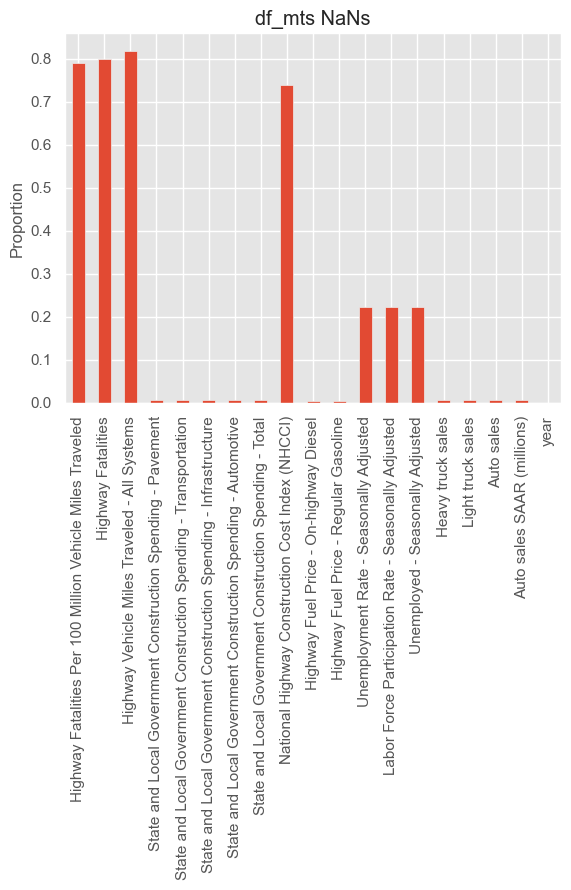

In [8]:
# Extract and create a new column year from the date column
df_mts = pd.read_csv('mts.csv').drop('Index', axis=1)
year = df_mts['Date'].str.extract(r'/(\d+)\s12', expand=False).astype(int)
df_mts['year'] = year

#EDITED TO ADD MONTH COLUMN
df_mts['month'] = df_mts['Date'].str[:2]
df_mts

# Filter for years desired
### CHANGE FOR MORE YEARS? len(df) in range [2000, 2022] contains only 275 entries ###
df_mts = df_mts[(df_mts['year']<=2022) & (df_mts['year']>=2000)]

# Filter for columns wated
### CHANGE FOR MORE COLUMNS? ###
df_mts_column_filter = df_mts.columns[[2, 3, 12, 34, 45, 61, 76, 82, 83, 84, 85, 95, 96, 97, 117, 119, 120, 129, 135,136]]
df_mts = df_mts[df_mts_column_filter]

# Compute proportion of NaNs in each column
df_mts_nan_proportion = abs(df_mts.describe().iloc[0:1].sub(len(df_mts))).div(len(df_mts))
df_mts_nan_proportion = df_mts_nan_proportion.rename({'count':'NaN Proportion'})

# Visualize
print(df_mts_nan_proportion.squeeze()) # squeeze condenses a DataFrame to a Series
plt.title('df_mts NaNs')
df_mts_nan_proportion.squeeze().plot.bar()
plt.ylabel('Proportion')
plt.show()

The following colums have more than $50\%$ `NaN` values:
* Highway Fatalities Per 100 Million Vehicle Miles Traveled
* Highway Fatalities
* Highway Vehicle Miles Traveled - All Systems
* National Highway Construction Cost Index (NHCCI)

Maybe also drop these columns?

In [9]:
# Explore the types for all columns filtered so far
df_mts.dtypes

Highway Fatalities Per 100 Million Vehicle Miles Traveled            float64
Highway Fatalities                                                   float64
Highway Vehicle Miles Traveled - All Systems                         float64
State and Local Government Construction Spending - Pavement          float64
State and Local Government Construction Spending - Transportation    float64
State and Local Government Construction Spending - Infrastructure    float64
State and Local Government Construction Spending - Automotive        float64
State and Local Government Construction Spending - Total             float64
National Highway Construction Cost Index (NHCCI)                     float64
Highway Fuel Price - On-highway Diesel                               float64
Highway Fuel Price - Regular Gasoline                                float64
Unemployment Rate - Seasonally Adjusted                              float64
Labor Force Participation Rate - Seasonally Adjusted                 float64

In [10]:
# Print out new column numbers for faster nav
for i, column in enumerate(df_mts.columns):
    print(str(i) + " : " + column)

0 : Highway Fatalities Per 100 Million Vehicle Miles Traveled
1 : Highway Fatalities
2 : Highway Vehicle Miles Traveled - All Systems
3 : State and Local Government Construction Spending - Pavement
4 : State and Local Government Construction Spending - Transportation
5 : State and Local Government Construction Spending - Infrastructure
6 : State and Local Government Construction Spending - Automotive
7 : State and Local Government Construction Spending - Total
8 : National Highway Construction Cost Index (NHCCI)
9 : Highway Fuel Price - On-highway Diesel
10 : Highway Fuel Price - Regular Gasoline
11 : Unemployment Rate - Seasonally Adjusted
12 : Labor Force Participation Rate - Seasonally Adjusted
13 : Unemployed - Seasonally Adjusted
14 : Heavy truck sales
15 : Light truck sales
16 : Auto sales
17 : Auto sales SAAR (millions)
18 : year
19 : month


Only numerical data.

In [11]:
# Graphing helper method
# df: DataFrame grouped by year
# columns: list containing the GROUP of State and Local Government Construction Spending
# ie. State and Local Government Construction Spending - Pavement, GROUP = "Pavement"
# Plots line plot
def plot_line_year_agg(df_grouped, columns, log_transform, normalize):
    # RESET index so helper works
    df_grouped = df_grouped.reset_index()
    # Oh god code looking ugly 
    ### IF LOG TRANSFORM ###
    if log_transform:
        df_grouped = df_grouped.reset_index()
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], [np.log(data) if data!=0 else 0 for data in df_grouped[column_string]], label=column)
            title_string + title_string + column + ', '
    ### IF NORMALIZE ###
    elif normalize:
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], zscore(df_grouped[column_string]), label=column)
            title_string + title_string + column + ', '
    ### NEITHER LOG TRANSFORM OR NORMALIZE ###
    else:
        # Loop to plot
        title_string = ""
        for column in columns:
            column_string = 'State and Local Government Construction Spending - ' + column
            plt.plot(df_grouped['year'], df_grouped[column_string], label=column)
            title_string + title_string + column + ', '
        
    # legends & labels
    plt.legend()
    plt.title('Construction Spending over the Years: {}'.format(title_string[:-2])) # slicing to get rid of last comma
    if log_transform:
        plt.ylabel('log(Spending)')
    elif normalize:
        plt.ylabel('zscore(Spending)')
    else:
        plt.ylabel('Spending')
    plt.xlabel('Year')
    plt.show()

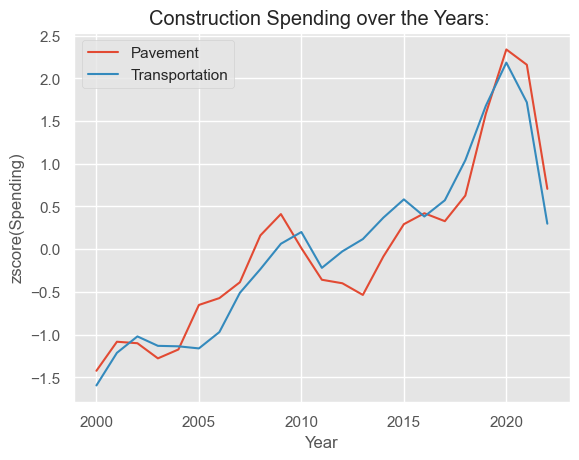

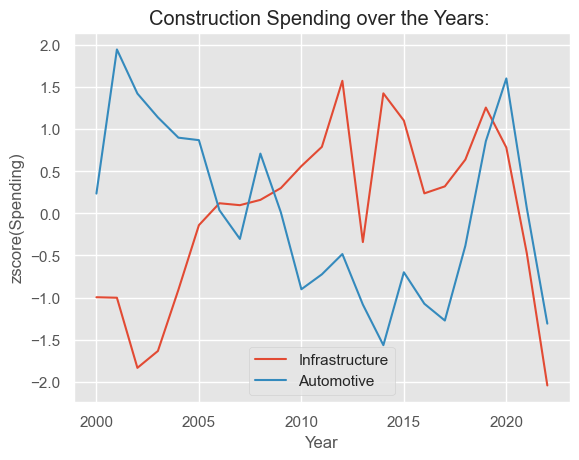

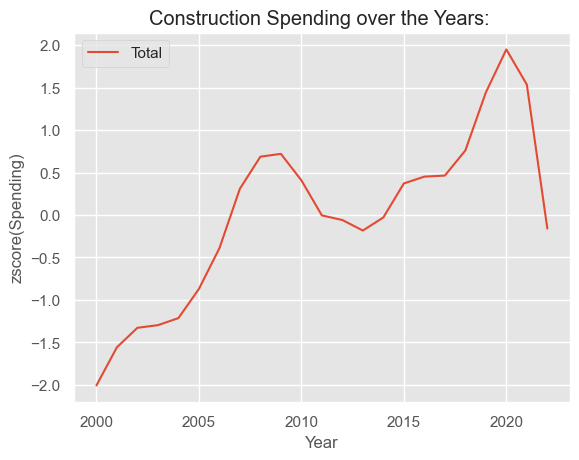

In [12]:
# aggregate by year to determine total spending on State and Local Government Construction Spending
df_mts_grouped_year = df_mts.groupby('year').sum()
plot_line_year_agg(df_mts_grouped_year, ['Pavement', 'Transportation'], False, True)
plot_line_year_agg(df_mts_grouped_year, ['Infrastructure', 'Automotive'], False, True)
plot_line_year_agg(df_mts_grouped_year, ['Total'], False, True)

In [13]:
### DEPRECATED CUZ DECIDED TO PUT INTO HELPER ###        
# df_grouped_year = df.groupby('year').sum()

# plot lineplots
# from trial and error, plot pavement and transportation together, infra and auto together, total separate

# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Pavement'], label='Pavement')
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Transportation'], label='Transportation')
# plt.legend()
# plt.title('Construction Spending over the Years: Pavement & Transportation')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()

# plt.figure()
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Infrastructure'], label='Infrastructure', color='green')
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Automotive'], label='Automotive', color='red')
# plt.legend()
# plt.title('Construction Spending over the Years: Infra & Auto')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()

# plt.figure()
# plt.plot(df_grouped_year.index, df_grouped_year['State and Local Government Construction Spending - Total'], label='Total', color='purple')
# plt.legend()
# plt.title('Construction Spending over the Years: Total')
# plt.ylabel('Spending')
# plt.xlabel('Year')
# plt.show()
### DEPRECATED CUZ DECIDED TO PUT INTO HELPER ###

In [14]:
# Begin connecting above df with df_gdp (U.S. GDP 1960-2022 dataset)
# Preprocessing on 'date' column of df_gdp
df_gdp_year = df_gdp['date'].str.extract('(\d+)-', expand=False)
df_gdp['year'] = df_gdp_year.astype(int)
df_gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change,year
0,1960-12-31,543.300000,3007.1234,NaN,1960
1,1961-12-31,563.300000,3066.5629,2.3000,1961
2,1962-12-31,605.100000,3243.8431,6.1000,1962
3,1963-12-31,638.600000,3374.5152,4.4000,1963
4,1964-12-31,685.800000,3573.9412,5.8000,1964
...,...,...,...,...,...
57,2017-12-31,19479.620056,59914.7778,2.2557,2017
58,2018-12-31,20527.156026,62805.2538,2.9189,2018
59,2019-12-31,21372.572437,65094.7994,2.2889,2019
60,2020-12-31,20893.743833,63027.6795,-3.4046,2020


In [15]:
# PERFORM LEFT JOIN on 'year'
# First group by year on df_mts (don't want duplicate years)
df_mts_grouped_year = df_mts.groupby('year').sum()
df_mts_gdp = df_mts_grouped_year.merge(df_gdp, how='left', left_on='year', right_on='year')
df_mts_gdp.columns

Index(['year', 'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
       'Highway Fatalities', 'Highway Vehicle Miles Traveled - All Systems',
       'State and Local Government Construction Spending - Pavement',
       'State and Local Government Construction Spending - Transportation',
       'State and Local Government Construction Spending - Infrastructure',
       'State and Local Government Construction Spending - Automotive',
       'State and Local Government Construction Spending - Total',
       'National Highway Construction Cost Index (NHCCI)',
       'Highway Fuel Price - On-highway Diesel',
       'Highway Fuel Price - Regular Gasoline',
       'Unemployment Rate - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted', 'Heavy truck sales',
       'Light truck sales', 'Auto sales', 'Auto sales SAAR (millions)', 'date',
       ' GDP ( Billions of US $)', ' Per Capita (US $)', ' Annual % Chang

In [16]:
# Similar helper as above, also plots GDP
# Calls previous helper plot_line_year_agg
### NEED TO PLOT NORMALIZED OTHERWISE SCALED IS SCREWED
### LOG TRANSFORM?
def plot_line_year_gdp(df_merged, columns):
    # Necessary preprocessing to get zscore (normalization)
    df_merged['GDP ($)'] = df_merged[' GDP ( Billions of US $)'] * 10**9 # WHY IS THERE A SPACE B4 GDP
    normalized_data = zscore(np.array(df_merged['GDP ($)']).reshape(-1, 1)[:-1]) # -1 cuz last element is a NaN
    plt.plot(df_merged['year'][:-1], normalized_data, label='GDP ($)')
    plot_line_year_agg(df_merged, columns, False, True) # SET NORMALIZE TO TRUE

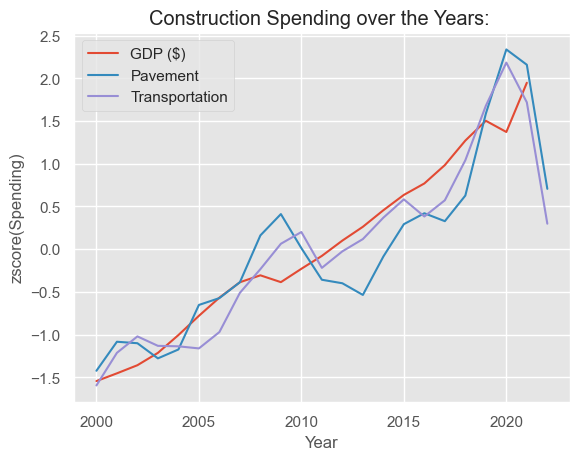

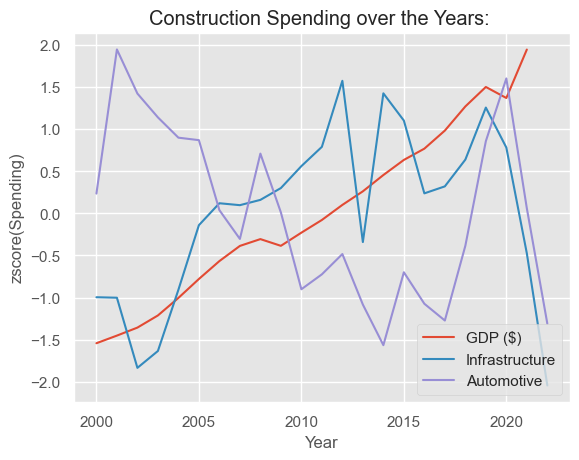

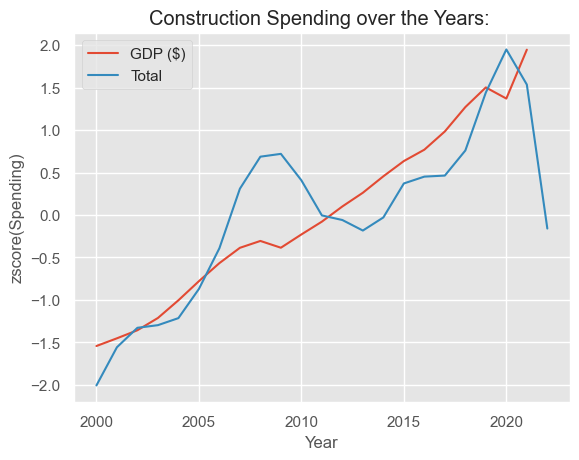

In [17]:
# Use helper
plot_line_year_gdp(df_mts_gdp, ['Pavement', 'Transportation'])
plot_line_year_gdp(df_mts_gdp, ['Infrastructure', 'Automotive'])
plot_line_year_gdp(df_mts_gdp, ['Total'])

The code for the helpers is horrible. But finally got it to work. 👍

From visuals above:

- Overall if Total Construction Spending increased, so did GDP; except for the most recent years
- Automotive spending doesn't seem to be tightly correlated with GDP? What happend in 2010 - 2018?
- In general spending on pavement and transportation is positively correlated with GDP

In [18]:
# Looking at column names. No idea why there is a space in front of some columns...
for col in df_mts_gdp.columns:
    print(col)

year
Highway Fatalities Per 100 Million Vehicle Miles Traveled
Highway Fatalities
Highway Vehicle Miles Traveled - All Systems
State and Local Government Construction Spending - Pavement
State and Local Government Construction Spending - Transportation
State and Local Government Construction Spending - Infrastructure
State and Local Government Construction Spending - Automotive
State and Local Government Construction Spending - Total
National Highway Construction Cost Index (NHCCI)
Highway Fuel Price - On-highway Diesel
Highway Fuel Price - Regular Gasoline
Unemployment Rate - Seasonally Adjusted
Labor Force Participation Rate - Seasonally Adjusted
Unemployed - Seasonally Adjusted
Heavy truck sales
Light truck sales
Auto sales
Auto sales SAAR (millions)
date
 GDP ( Billions of US $)
 Per Capita (US $)
 Annual % Change
GDP ($)


## EDA Visualization 2

In [19]:
# take the US covid mobility dataset for the past 3 years
# average this because we don't have any specific regional dataset 

# Compare these against spending 

# optional 
# Auto Sales - confounder, reflection of the economic state
# Highway fuel price - confounder reflection of the economy
# Construction Spending - our given question

In [20]:
df_2020 = pd.read_csv('2020_Mobility_Report.csv')
df_2020[["year", "month", "day"]] = df_2020["date"].str.split("-", expand = True).astype(int)
df_2020 = df_2020.groupby(['year','month']).mean()
df_2020

metro_area  census_fips_code  \
year month                                 
2020 2             NaN      30335.466212   
     3             NaN      30341.198683   
     4             NaN      30349.272816   
     5             NaN      30372.493874   
     6             NaN      30351.631961   
     7             NaN      30343.711984   
     8             NaN      30501.157579   
     9             NaN      30439.164161   
     10            NaN      30355.300877   
     11            NaN      30358.676444   
     12            NaN      30337.687044   

            retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2020 2                                               6.145196    
     3                                             -10.379869    
     4                                             -34.688613    
     5                                             -15.271136    
     6                                              -3.024183    
     7                                              -2.586165    
     8                                              -4.941095    
     9                                              -5.797525    
     10                                             -6.575246    
     11                                            -13.005764    
     12                                            -12.766072    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2020 2                                               2.103233   
     3                                               5.360028   
     4                                              -9.515706   
     5                                               2.834255   
     6                                               7.141806   
     7                                               6.439050   
     8                                               2.125458   
     9                                              -0.788882   
     10                                             -0.347786   
     11                                             -3.098407   
     12                                             -0.569361   

            parks_percent_change_from_baseline  \
year month                                       
2020 2                               14.454504   
     3                               14.432377   
     4                                1.069038   
     5                               38.376006   
     6                               68.486314   
     7                               72.179214   
     8                               60.652013   
     9                               50.750093   
     10                              34.565942   
     11                               8.037823   
     12                              -7.293245   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2020 2                                           4.253531   
     3                                          -8.988731   
     4                                         -31.144862   
     5                                         -16.831389   
     6                                          -5.046891   
     7                                          -4.334902   
     8                                          -8.239617   
     9                                          -9.887331   
     10                                         -8.041802   
     11                                        -15.490500   
     12                                        -18.425099   

            workplaces_percent_change_from_baseline  \
year month                                            
2020 2                                    -0.086161   
     3                                   -14.747643   
     4                                   -37.378917   
     5        

In [21]:
df_2021 = pd.read_csv('2021_Mobility_Report.csv')
df_2021[["year", "month", "day"]] = df_2021["date"].str.split("-", expand = True).astype(int)
df_2021 = df_2021.groupby(['year','month']).mean()
df_2021

metro_area  census_fips_code  \
year month                                 
2021 1             NaN      30364.780196   
     2             NaN      30366.091153   
     3             NaN      30335.575201   
     4             NaN      30335.291028   
     5             NaN      30352.802416   
     6             NaN      30336.022779   
     7             NaN      30340.260281   
     8             NaN      30344.810948   
     9             NaN      30338.796282   
     10            NaN      30361.406338   
     11            NaN      30343.756919   
     12            NaN      30332.129739   

            retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2021 1                                             -18.736443    
     2                                             -17.121149    
     3                                              -0.483461    
     4                                               2.393818    
     5                                               5.754814    
     6                                               8.776731    
     7                                               9.209235    
     8                                               7.336976    
     9                                               4.511183    
     10                                              3.923111    
     11                                              0.106935    
     12                                              0.654558    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2021 1                                              -9.906860   
     2                                              -7.962159   
     3                                               0.422380   
     4                                               4.203664   
     5                                               9.848665   
     6                                              11.538155   
     7                                              13.013839   
     8                                              12.295815   
     9                                               9.215849   
     10                                              8.156106   
     11                                              6.947994   
     12                                              8.657010   

            parks_percent_change_from_baseline  \
year month                                       
2021 1                              -13.880025   
     2                              -16.770441   
     3                               17.103678   
     4                               37.023646   
     5                               54.820548   
     6                               66.979276   
     7                               68.466468   
     8                               52.563217   
     9                               51.778130   
     10                              37.788250   
     11                               9.772222   
     12                              -0.918076   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2021 1                                         -21.702128   
     2                                         -20.958099   
     3                                          -5.895302   
     4                                          -1.405187   
     5                                           2.615845   
     6                                           8.156893   
     7                                          10.259435   
     8                                           5.606553   
     9                                           1.880883   
     10                                          2.040745   
     11                                         -0.841451   
     12                                         -4.581043   

   

In [22]:
df_2022 = pd.read_csv('2022_Mobility_Report.csv')
df_2022[["year", "month", "day"]] = df_2022["date"].str.split("-", expand = True).astype(int)
df_2022 = df_2022.groupby(['year','month']).mean()
df_2022

metro_area  census_fips_code  \
year month                                 
2022 1             NaN      30368.440938   
     2             NaN      30354.845417   
     3             NaN      30348.371343   
     4             NaN      30367.329286   
     5             NaN      30363.323584   
     6             NaN      30358.774503   
     7             NaN      30371.951885   
     8             NaN      30359.406507   
     9             NaN      30360.786543   
     10            NaN      30386.827656   

            retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2022 1                                             -13.565027    
     2                                              -5.464329    
     3                                              -1.993282    
     4                                               0.850551    
     5                                               5.154013    
     6                                               5.498054    
     7                                               4.414815    
     8                                               6.056941    
     9                                               3.811591    
     10                                              3.797362    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2022 1                                              -3.180445   
     2                                               0.007143   
     3                                              -0.585566   
     4                                               3.040810   
     5                                               7.649427   
     6                                               8.357191   
     7                                               8.483072   
     8                                               8.276502   
     9                                               7.474052   
     10                                              6.814161   

            parks_percent_change_from_baseline  \
year month                                       
2022 1                              -13.847191   
     2                                1.873881   
     3                               18.024373   
     4                               35.818017   
     5                               52.762716   
     6                               65.043398   
     7                               65.361896   
     8                               55.662415   
     9                               49.513900   
     10                              45.267090   

            transit_stations_percent_change_from_baseline  \
year month                                                  
2022 1                                         -13.199217   
     2                                          -8.306109   
     3                                          -3.422697   
     4                                          -1.476036   
     5                                           1.162369   
     6                                           5.319231   
     7                                           5.263010   
     8                                           3.138602   
     9                                           1.207386   
     10                                          1.770237   

            workplaces_percent_change_from_baseline  \
year month                                            
2022 1                                   -18.186162   
     2                                   -13.602249   
     3                                   -10.792810   
     4                                   -10.965035   
     5                                   -13.320391   
     6                                   -17.465682   
     7                                   -20.234234   
     8                                   -15.420028   
     9                   

In [23]:
all_mobility = df_2020.append(df_2021).append(df_2022)
all_mobility.drop(columns = ['day','metro_area','census_fips_code'], inplace = True)
all_mobility

/var/folders/rw/hxsnv9_j0rbc5z5qz0v00p5w0000gn/T/ipykernel_14534/873392823.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_mobility = df_2020.append(df_2021).append(df_2022)
/var/folders/rw/hxsnv9_j0rbc5z5qz0v00p5w0000gn/T/ipykernel_14534/873392823.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_mobility = df_2020.append(df_2021).append(df_2022)


retail_and_recreation_percent_change_from_baseline  \
year month                                                       
2020 2                                               6.145196    
     3                                             -10.379869    
     4                                             -34.688613    
     5                                             -15.271136    
     6                                              -3.024183    
     7                                              -2.586165    
     8                                              -4.941095    
     9                                              -5.797525    
     10                                             -6.575246    
     11                                            -13.005764    
     12                                            -12.766072    
2021 1                                             -18.736443    
     2                                             -17.121149    
     3                                              -0.483461    
     4                                               2.393818    
     5                                               5.754814    
     6                                               8.776731    
     7                                               9.209235    
     8                                               7.336976    
     9                                               4.511183    
     10                                              3.923111    
     11                                              0.106935    
     12                                              0.654558    
2022 1                                             -13.565027    
     2                                              -5.464329    
     3                                              -1.993282    
     4                                               0.850551    
     5                                               5.154013    
     6                                               5.498054    
     7                                               4.414815    
     8                                               6.056941    
     9                                               3.811591    
     10                                              3.797362    

            grocery_and_pharmacy_percent_change_from_baseline  \
year month                                                      
2020 2                                               2.103233   
     3                                               5.360028   
     4                                              -9.515706   
     5                                               2.834255   
     6                                               7.141806   
     7                                               6.439050   
     8                                               2.125458   
     9                                              -0.788882   
     10                                             -0.347786   
     11                                             -3.098407   
     12                                             -0.569361   
2021 1                                              -9.906860   
     2                                              -7.962159   
     3                                               0.422380   
     4                                               4.203664   
     5                                               9.848665   
     6                                              11.538155   
     7                                              13.013839   
     8                                              12.295815   
     9                                               9.215849   
     10                                              8.156106   
     11                                              6.947994   
     12                                              8.657010   
2022 1                                              -3.180445   
     2     

In [24]:
df_mts_2020plus = df_mts[df_mts['year'] >= 2020]
df_mts_2020plus['month'] = df_mts_2020plus['month'].astype(str).astype(int)
df_mts_2020plus = df_mts_2020plus.groupby(['year','month']).mean()
df_mts_2020plus.drop(df_mts_2020plus.tail(1).index,inplace=True)
df_mts_2020plus

/var/folders/rw/hxsnv9_j0rbc5z5qz0v00p5w0000gn/T/ipykernel_14534/3067024350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mts_2020plus['month'] = df_mts_2020plus['month'].astype(str).astype(int)


Highway Fatalities Per 100 Million Vehicle Miles Traveled  \
year month                                                              
2020 1                                                   1.08           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.43           
     5                                                    NaN           
     6                                                    NaN           
     7                                                   1.44           
     8                                                    NaN           
     9                                                    NaN           
     10                                                  1.40           
     11                                                   NaN           
     12                                                   NaN           
2021 1                                                   1.25           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.34           
     5                                                    NaN           
     6                                                    NaN           
     7                                                   1.37           
     8                                                    NaN           
     9                                                    NaN           
     10                                                  1.35           
     11                                                   NaN           
     12                                                   NaN           
2022 1                                                   1.27           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.27           
     5                                                    NaN           
     6                                                    NaN           
     7                                                    NaN           
     8                                                    NaN           
     9                                                    NaN           
     10                                                   NaN           

            Highway Fatalities  Highway Vehicle Miles Traveled - All Systems  \
year month                                                                     
2020 1                  7900.0                                  2.608470e+11   
     2                     NaN                                  2.426950e+11   
     3                     NaN                                  2.266380e+11   
     4                  9120.0                                  1.676170e+11   
     5                     NaN                                  2.210060e+11   
     6                     NaN                                  2.503300e+11   
     7                 11305.0                                  2.655500e+11   
     8                     NaN                                  2.650600e+11   
     9                     NaN                                  2.575310e+11   
     10                10355.0                                  2.665960e+11   
     11                    NaN                                  2.383000e+11   
     12                    NaN                                  2.414510e+11   
2021 1                  8905.0                                  2.310300e+11   
     2                     NaN                                  2.130380e+11   
     3                     NaN                                  2.694750e+11   
     4                 

In [25]:
mobilityxspending = df_mts_2020plus.join(all_mobility)
mobilityxspending

Highway Fatalities Per 100 Million Vehicle Miles Traveled  \
year month                                                              
2020 1                                                   1.08           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.43           
     5                                                    NaN           
     6                                                    NaN           
     7                                                   1.44           
     8                                                    NaN           
     9                                                    NaN           
     10                                                  1.40           
     11                                                   NaN           
     12                                                   NaN           
2021 1                                                   1.25           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.34           
     5                                                    NaN           
     6                                                    NaN           
     7                                                   1.37           
     8                                                    NaN           
     9                                                    NaN           
     10                                                  1.35           
     11                                                   NaN           
     12                                                   NaN           
2022 1                                                   1.27           
     2                                                    NaN           
     3                                                    NaN           
     4                                                   1.27           
     5                                                    NaN           
     6                                                    NaN           
     7                                                    NaN           
     8                                                    NaN           
     9                                                    NaN           
     10                                                   NaN           

            Highway Fatalities  Highway Vehicle Miles Traveled - All Systems  \
year month                                                                     
2020 1                  7900.0                                  2.608470e+11   
     2                     NaN                                  2.426950e+11   
     3                     NaN                                  2.266380e+11   
     4                  9120.0                                  1.676170e+11   
     5                     NaN                                  2.210060e+11   
     6                     NaN                                  2.503300e+11   
     7                 11305.0                                  2.655500e+11   
     8                     NaN                                  2.650600e+11   
     9                     NaN                                  2.575310e+11   
     10                10355.0                                  2.665960e+11   
     11                    NaN                                  2.383000e+11   
     12                    NaN                                  2.414510e+11   
2021 1                  8905.0                                  2.310300e+11   
     2                     NaN                                  2.130380e+11   
     3                     NaN                                  2.694750e+11   
     4                 

In [26]:
df2 = mobilityxspending.reset_index()
df2['year'] = df2['year'].astype(str)
df2['month'] = df2['month'].astype(str)
df2['date2'] = df2['month'] + "/" + df2['year']
date_time = pd.to_datetime(df2['date2'])
df2['date'] = date_time
df2

,year,month,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,Highway Vehicle Miles Traveled - All Systems,State and Local Government Construction Spending - Pavement,State and Local Government Construction Spending - Transportation,State and Local Government Construction Spending - Infrastructure,State and Local Government Construction Spending - Automotive,State and Local Government Construction Spending - Total,...,Auto sales,Auto sales SAAR (millions),retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2,date
0,2020,1,1.08,7900.0,2.608470e+11,3.220000e+09,2.879000e+09,121000000.0,151000000.0,2.177500e+10,...,293200.0,4306000.0,NaN,NaN,NaN,NaN,NaN,NaN,1/2020,2020-01-01
1,2020,2,NaN,NaN,2.426950e+11,3.475000e+09,2.948000e+09,114000000.0,162000000.0,2.236600e+10,...,346500.0,4176000.0,6.145196,2.103233,14.454504,4.253531,-0.086161,0.232813,2/2020,2020-02-01
2,2020,3,NaN,NaN,2.266380e+11,4.055000e+09,3.094000e+09,127000000.0,154000000.0,2.406000e+10,...,264700.0,2847000.0,-10.379869,5.360028,14.432377,-8.988731,-14.747643,6.571577,3/2020,2020-03-01
3,2020,4,1.43,9120.0,1.676170e+11,5.159000e+09,3.195000e+09,121000000.0,155000000.0,2.649300e+10,...,166400.0,1898000.0,-34.688613,-9.515706,1.069038,-31.144862,-37.378917,16.550969,4/2020,2020-04-01
4,2020,5,NaN,NaN,2.210060e+11,6.814000e+09,3.560000e+09,135000000.0,150000000.0,3.015900e+10,...,258500.0,2625000.0,-15.271136,2.834255,38.376006,-16.831389,-28.982362,11.671517,5/2020,2020-05-01
5,2020,6,NaN,NaN,2.503300e+11,8.014000e+09,3.755000e+09,144000000.0,136000000.0,3.333300e+10,...,251200.0,2827000.0,-3.024183,7.141806,68.486314,-5.046891,-22.866399,7.511058,6/2020,2020-06-01
6,2020,7,1.44,11305.0,2.655500e+11,8.256000e+09,3.726000e+09,153000000.0,144000000.0,3.367500e+10,...,292600.0,3421000.0,-2.586165,6.439050,72.179214,-4.334902,-26.354184,7.363172,7/2020,2020-07-01
7,2020,8,NaN,NaN,2.650600e+11,8.496000e+09,4.083000e+09,117000000.0,142000000.0,3.376100e+10,...,299800.0,3441000.0,-4.941095,2.125458,60.652013,-8.239617,-24.309371,5.968838,8/2020,2020-08-01
8,2020,9,NaN,NaN,2.575310e+11,8.005000e+09,3.818000e+09,101000000.0,148000000.0,3.219100e+10,...,304800.0,3785000.0,-5.797525,-0.788882,50.750093,-9.887331,-21.267406,5.067323,9/2020,2020-09-01
9,2020,10,1.40,10355.0,2.665960e+11,7.679000e+09,3.718000e+09,115000000.0,158000000.0,3.105600e+10,...,313600.0,3951000.0,-6.575246,-0.347786,34.565942,-8.041802,-18.410810,4.954076,10/2020,2020-10-01


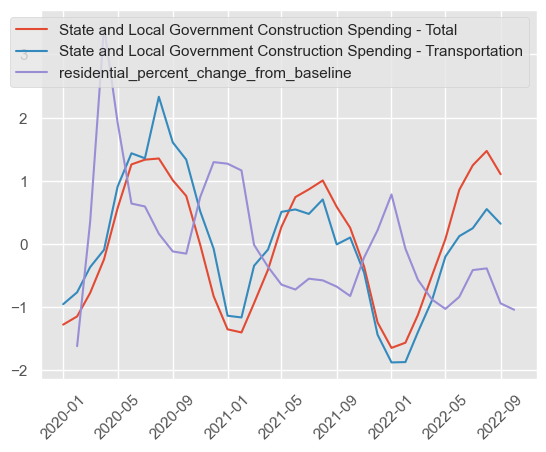

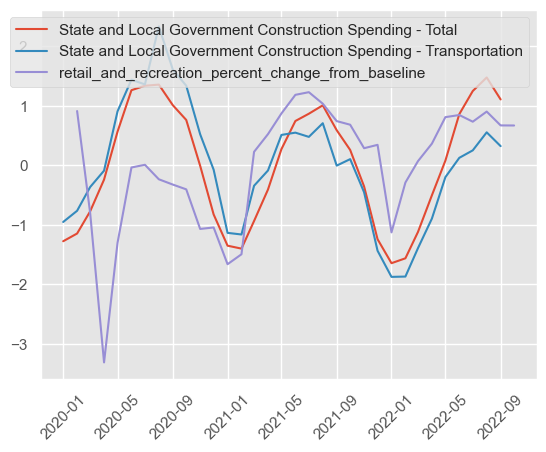

In [27]:
# Plotting two columns at a time because Jupyter Notebook condenses them and it doesn't show up
# on well as a .pdf file

arr = ["residential_percent_change_from_baseline","retail_and_recreation_percent_change_from_baseline"]
for i in arr: 
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Total"],nan_policy='omit'), label = "State and Local Government Construction Spending - Total")
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Transportation"],nan_policy='omit'), label = "State and Local Government Construction Spending - Transportation")
    plt.plot(df2["date"],zscore(df2[i],nan_policy='omit'), label = i)
    plt.legend(loc="upper right")
    plt.xticks(rotation = 45)
    plt.show()

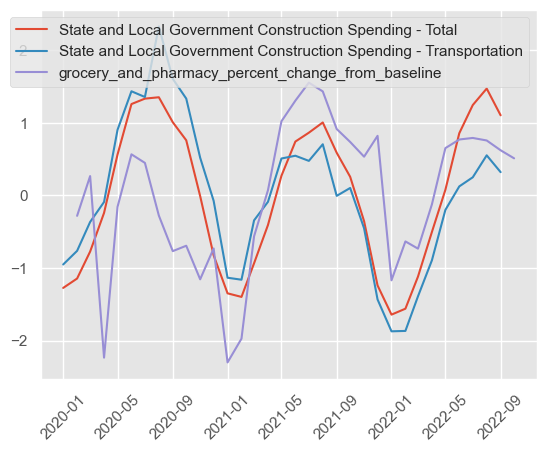

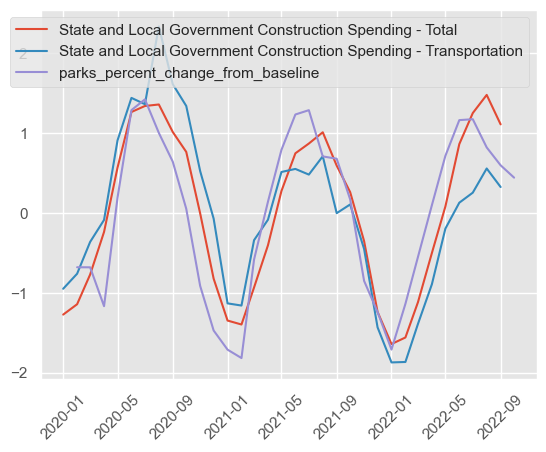

In [28]:
arr2 = ["grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline"]
for i in arr2: 
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Total"],nan_policy='omit'), label = "State and Local Government Construction Spending - Total")
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Transportation"],nan_policy='omit'), label = "State and Local Government Construction Spending - Transportation")
    plt.plot(df2["date"],zscore(df2[i],nan_policy='omit'), label = i)
    plt.legend(loc="upper right")
    plt.xticks(rotation = 45)
    plt.show()

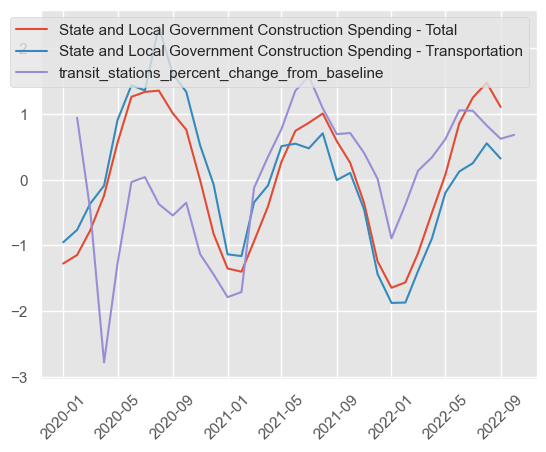

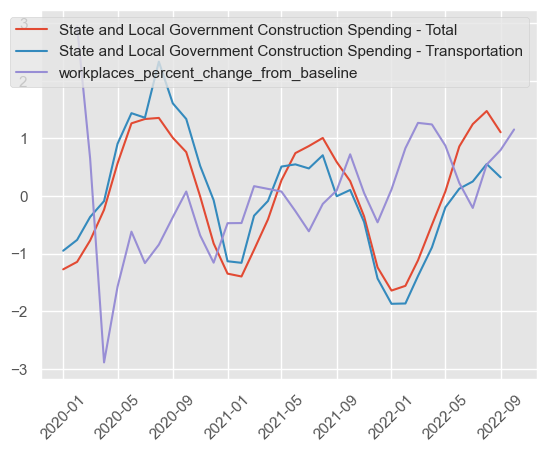

In [29]:
arr3 = ["transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline"]
for i in arr3: 
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Total"],nan_policy='omit'), label = "State and Local Government Construction Spending - Total")
    plt.plot(df2["date"],zscore(df2["State and Local Government Construction Spending - Transportation"],nan_policy='omit'), label = "State and Local Government Construction Spending - Transportation")
    plt.plot(df2["date"],zscore(df2[i],nan_policy='omit'), label = i)
    plt.legend(loc="upper right")
    plt.xticks(rotation = 45)
    plt.show()

## EDA Visualization 3 - 4

In [30]:
url = "https://data.bts.gov/resource/crem-w557.json"
r = requests.get(url)
data = pd.DataFrame(r.json())
mob_data = data.drop(['index'], axis = 1)
date_dict = {'01': 'Jan',
             '02': 'Feb',
             '03': 'Mar',
             '04': 'Apr',
             '05': 'May',
             '06': 'Jun',
             '07': 'Jul',
             '08': 'Aug',
             '09': 'Sep',
             '10': 'Oct',
             '11': 'Nov',
             '12': 'Dec'}

fatalities = mob_data[~mob_data['safety_highway_fatalities_1'].isna()]
fatalities = fatalities[['date','safety_highway_fatalities_1','highway_fuel_prices_regular', 'transportation_economic_3', 
                         'transportation_economic_2', 'general_economic_indicators_2',
                         'auto_sales', 'capital_expenditures_state_47']]
fatalities.columns = ['date', 'fatalities', 'gas_price', 'truck_employ', 'pers_spend', 'lab_force_partic', 'auto_sales', 'highway_spending']
fatalities['month'] = fatalities['date'].apply(lambda x: x[5:7])
fatalities['month'] = fatalities['month'].map(date_dict)
fatalities = fatalities.join(pd.get_dummies(fatalities.month, prefix='month'))
fatalities['highway_spending'] = fatalities['highway_spending'].apply(lambda x: float(x)) / 10000000

fatalities['gas_price'] = fatalities['gas_price'].apply(lambda x: float(x))
fatalities['truck_employ'] = fatalities['truck_employ'].apply(lambda x: float(x))
fatalities['pers_spend'] = fatalities['pers_spend'].apply(lambda x: float(x))
fatalities['lab_force_partic'] = fatalities['lab_force_partic'].apply(lambda x: float(x))
fatalities['auto_sales'] = fatalities['auto_sales'].apply(lambda x: float(x))
fatalities['fatalities'] = fatalities['fatalities'].apply(lambda x: float(x)) * 100
fatalities.head()

,date,fatalities,gas_price,truck_employ,pers_spend,lab_force_partic,auto_sales,highway_spending,month,month_Apr,month_Jan,month_Jul,month_Oct
732,2008-01-01T00:00:00.000,122.0,3.043,1391900.0,3.535940e+11,0.662,495800.0,368.4,Jan,0,1,0,0
735,2008-04-01T00:00:00.000,125.0,3.458,1394400.0,3.491970e+11,0.659,656800.0,577.4,Apr,1,0,0,0
738,2008-07-01T00:00:00.000,133.0,4.062,1404300.0,3.432790e+11,0.661,618800.0,880.5,Jul,0,0,1,0
741,2008-10-01T00:00:00.000,132.0,3.051,1386800.0,3.313030e+11,0.660,427100.0,854.5,Oct,0,0,0,1
744,2009-01-01T00:00:00.000,109.0,1.788,1287600.0,3.233560e+11,0.657,312700.0,376.9,Jan,0,1,0,0


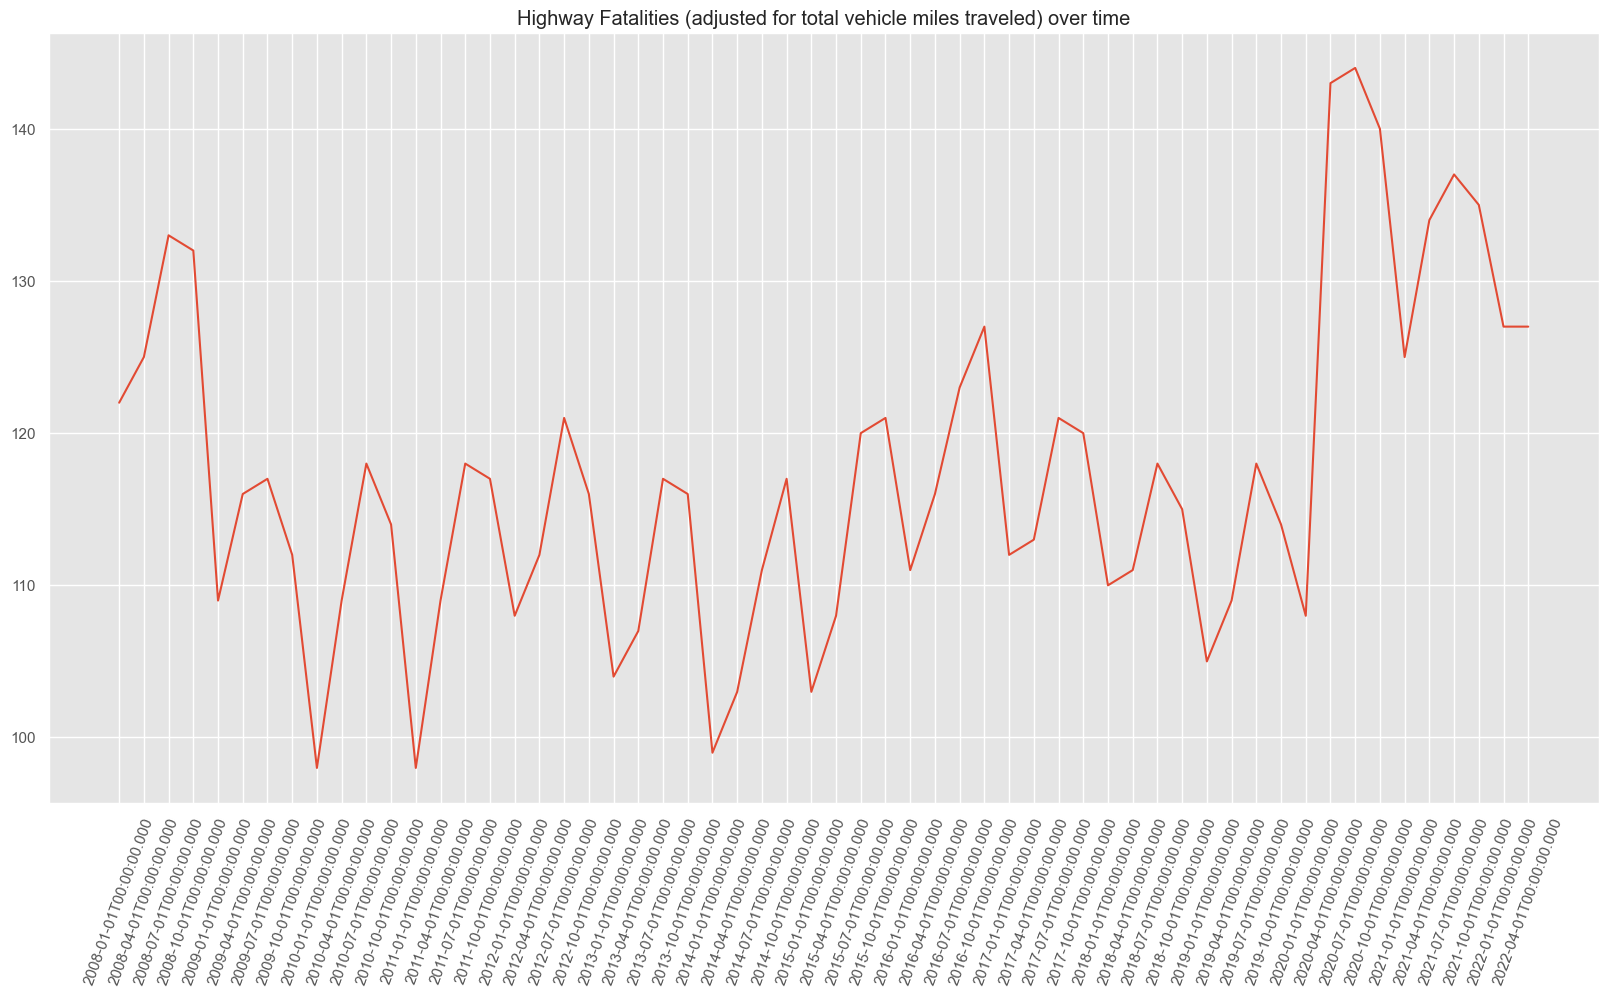

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(fatalities['date'], fatalities["fatalities"].apply(lambda x: float(x)))
plt.title("Highway Fatalities (adjusted for total vehicle miles traveled) over time")
plt.xticks(rotation=70);

In [32]:
X = fatalities[['gas_price', 'truck_employ', 
                'pers_spend', 'lab_force_partic', 'auto_sales', 'highway_spending',
               'month_Apr', 'month_Jan', 'month_Jul', 'month_Oct']]
y = fatalities['fatalities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
model_test = X_train.join(y_train)
model_test['month_Apr'] = np.sin(model_test['month_Apr'])
model_test['month_Jan'] = np.sin(model_test['month_Jan'])
model_test['month_Jul'] = np.sin(model_test['month_Jul'])
model_test['month_Oct'] = np.sin(model_test['month_Oct'])

model_test.head()

,gas_price,truck_employ,pers_spend,lab_force_partic,auto_sales,highway_spending,month_Apr,month_Jan,month_Jul,month_Oct,fatalities
822,2.794,1481100.0,3.890110e+11,0.626,647900.0,1012.3,0.000000,0.0,0.841309,0.000000,120.0
879,1.841,1413100.0,2.786420e+11,0.602,166400.0,732.5,0.841309,0.0,0.000000,0.000000,143.0
882,2.183,1461300.0,3.260220e+11,0.615,292600.0,1110.3,0.000000,0.0,0.841309,0.000000,144.0
894,3.136,1530700.0,4.257670e+11,0.617,304700.0,1077.6,0.000000,0.0,0.841309,0.000000,137.0
777,3.448,1330400.0,3.392430e+11,0.641,470100.0,848.5,0.000000,0.0,0.000000,0.841309,117.0


## Modeling and Testing Validity of a Poisson Likelihood

Let $X=$ # of Highway Fatalities, and 

$$\lambda_i = exp(q_0 + q_1 X_i)$$
$$X_{t} \sim Poisson(\lambda_{i})$$

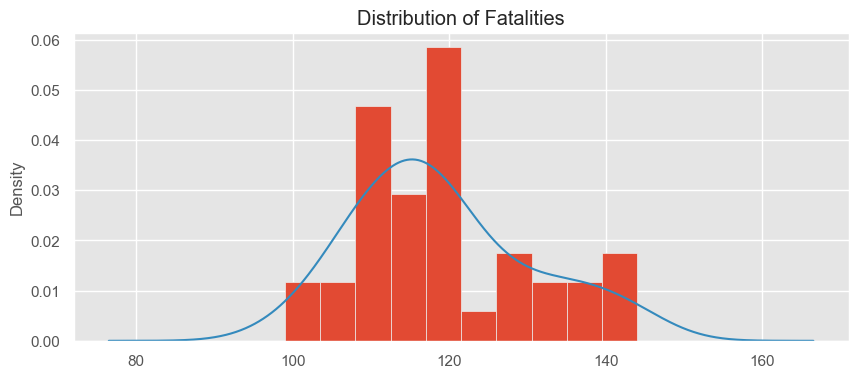

In [34]:
fig, ax = plt.subplots(figsize = (10,4))

model_test['fatalities'].plot(kind = "hist", density = True, bins = 10)
model_test['fatalities'].plot(kind='kde')
plt.title('Distribution of Fatalities');


/var/folders/rw/hxsnv9_j0rbc5z5qz0v00p5w0000gn/T/ipykernel_14534/95587812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_plot['prev_spending'] = corr_plot.highway_spending.shift(1)


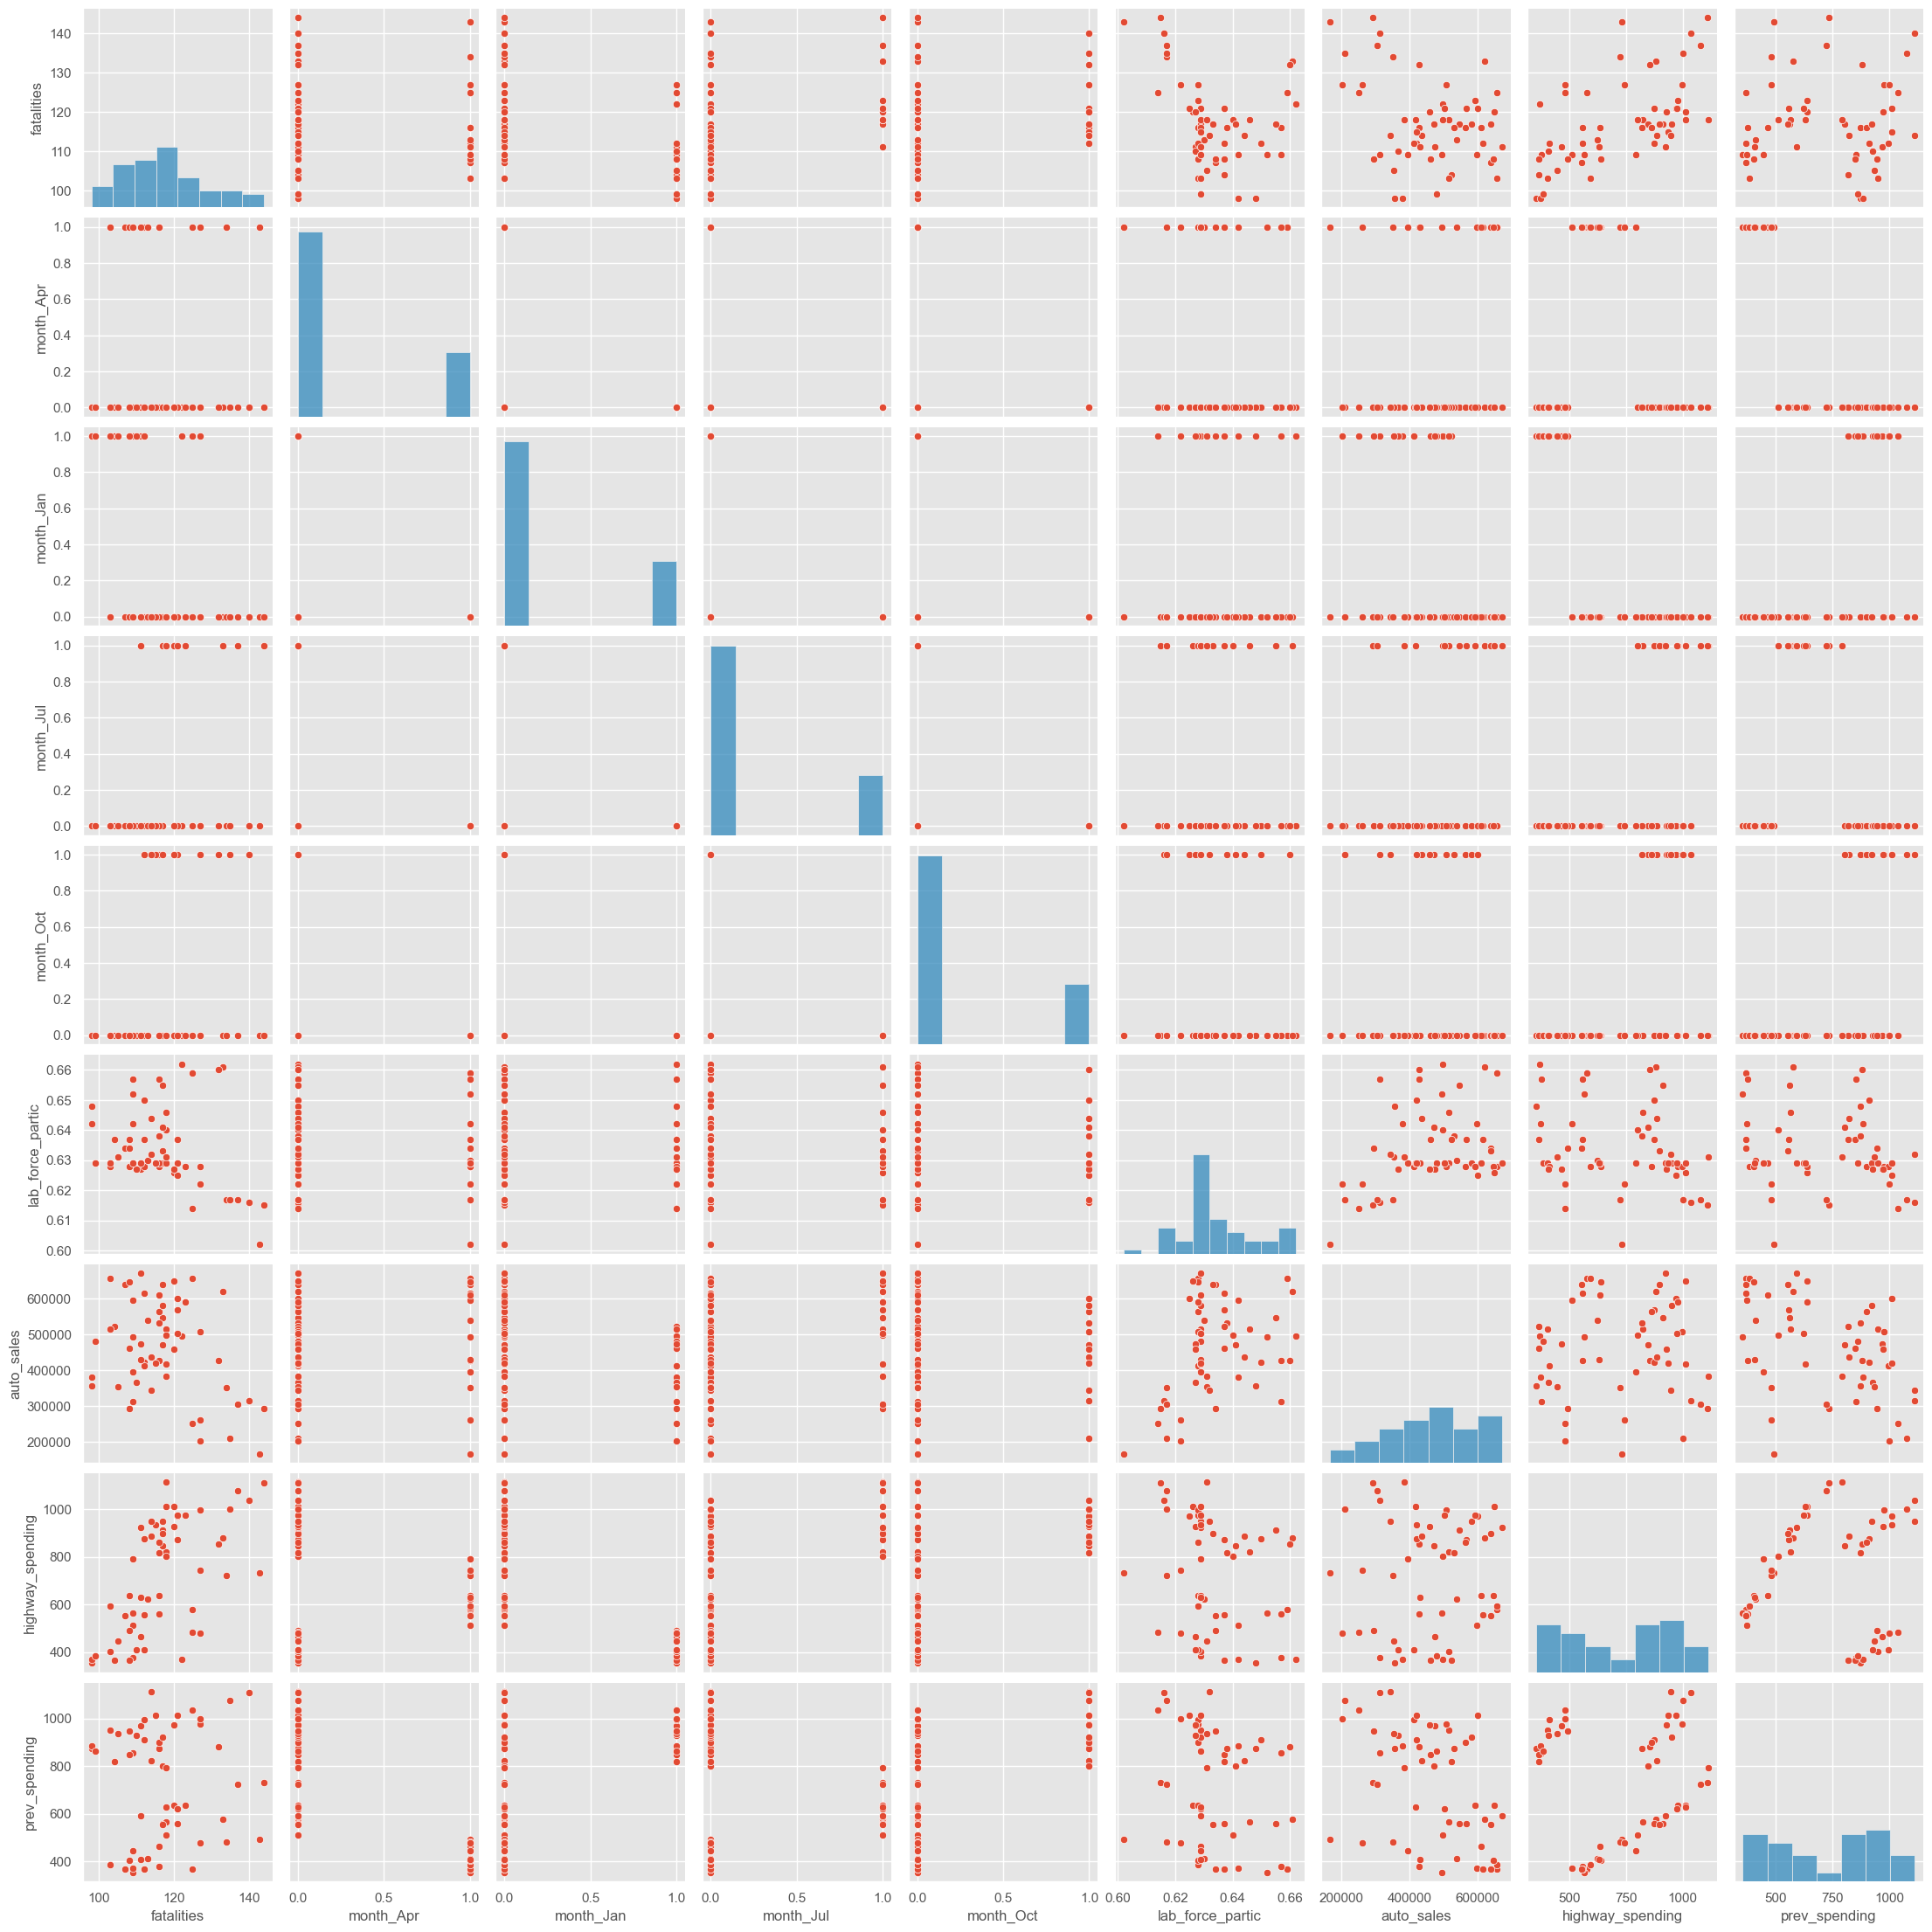

In [35]:
import seaborn as sns

corr_plot = fatalities[['fatalities', 'month_Apr', 'month_Jan', 'month_Jul','month_Oct', 
                        'lab_force_partic', 'auto_sales', 'highway_spending']]
corr_plot['prev_spending'] = corr_plot.highway_spending.shift(1)
corr_plot
sns.pairplot(corr_plot); 

In [36]:
import pymc3 as pm
import arviz as az
import statsmodels.api as sm


f_mod = fatalities.copy()
with pm.Model() as bayes_model:
    glm.GLM.from_formula('fatalities ~ highway_spending + lab_force_partic + month_Jan + month_Apr + month_Jul + month_Oct', model_test, family=glm.families.Poisson()) 
    # PYMC3 automatically uses exponential link function and adds an intercept term
    trace_poisson = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, month_Oct, month_Jul, month_Apr, month_Jan, lab_force_partic, highway_spending, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 111 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [37]:
bayes_model.basic_RVs

[Intercept ~ Flat,
 highway_spending ~ Normal,
 lab_force_partic ~ Normal,
 month_Jan ~ Normal,
 month_Apr ~ Normal,
 month_Jul ~ Normal,
 month_Oct ~ Normal,
 mu_log__ ~ TransformedDistribution,
 y ~ Poisson]

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


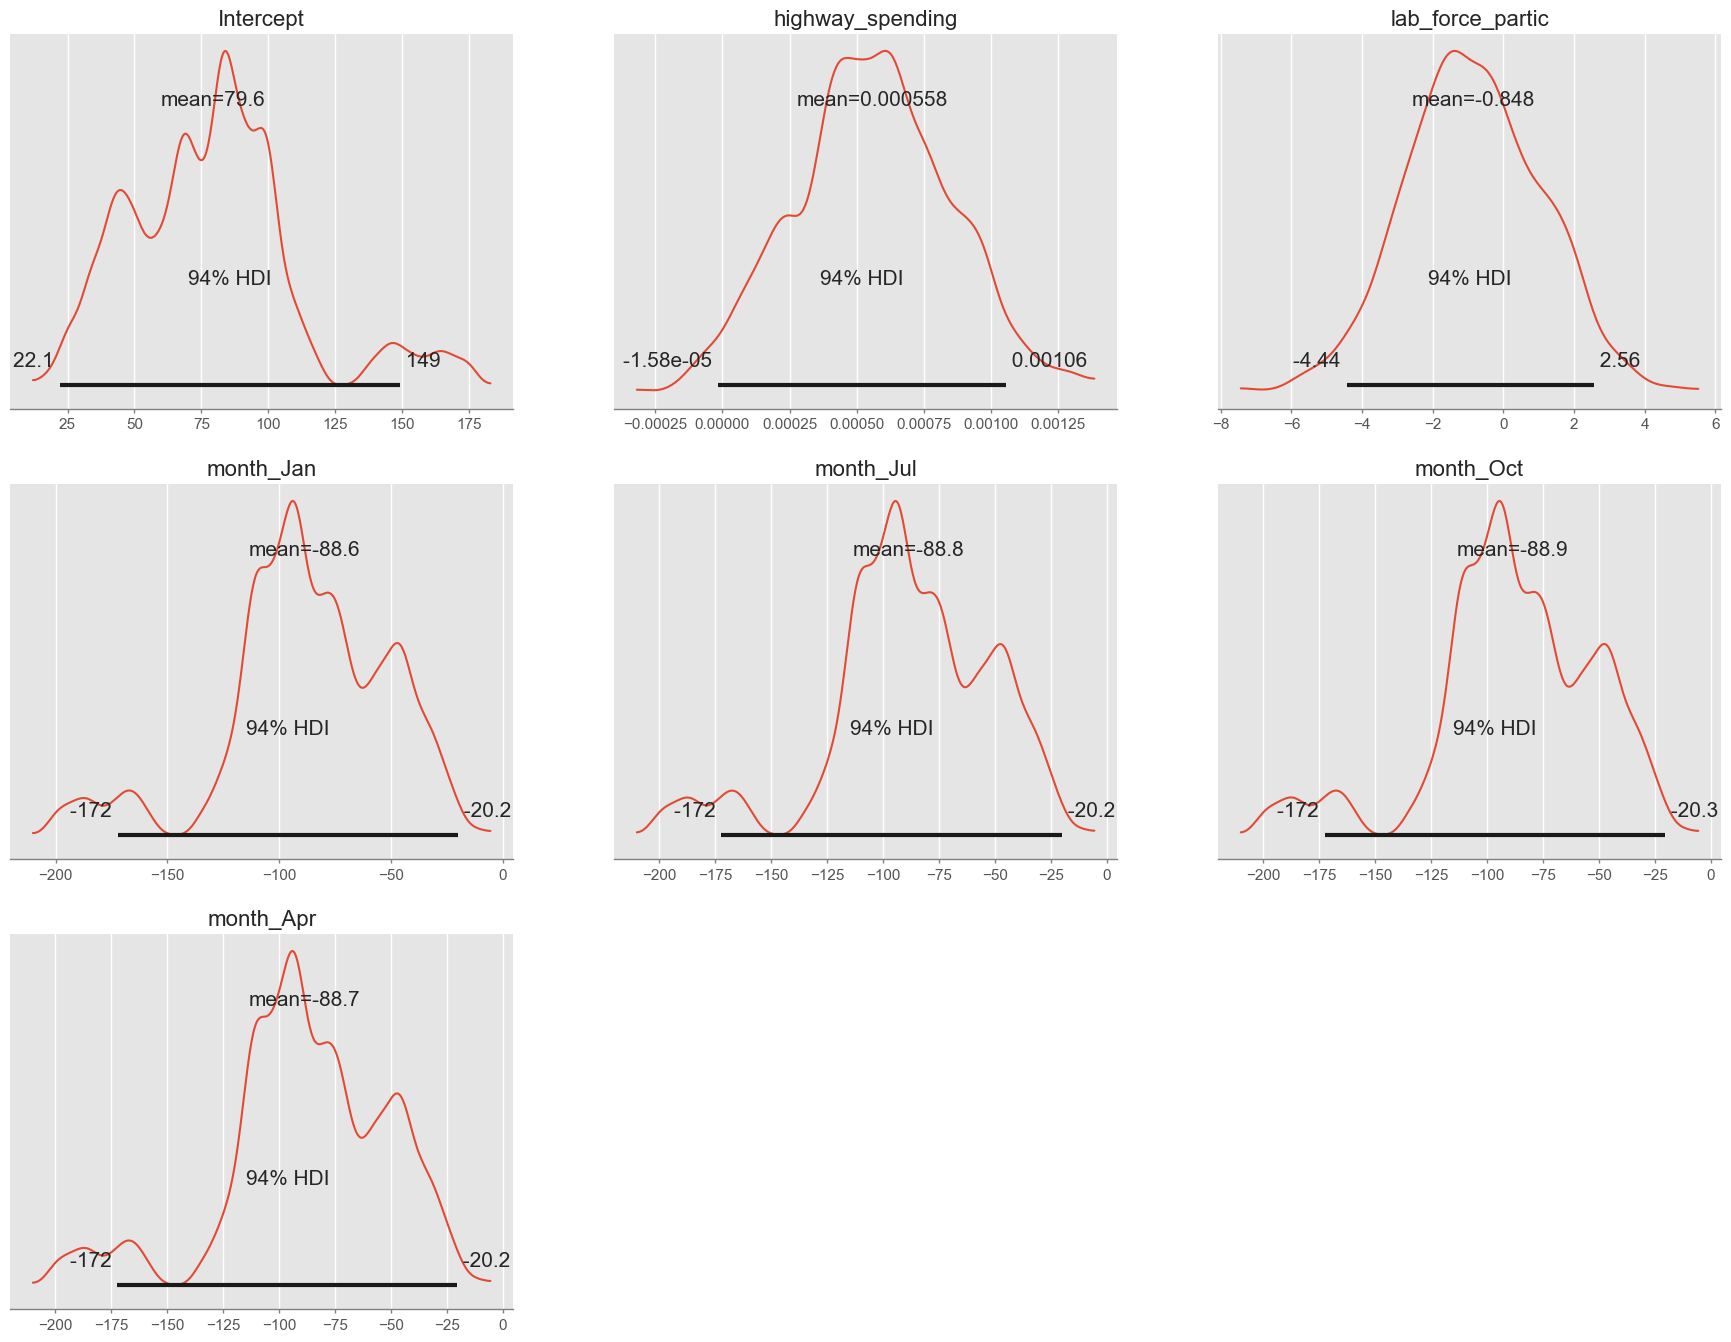

In [38]:
az.plot_posterior(trace_poisson, ['Intercept', 'highway_spending', 'lab_force_partic','month_Jan', 'month_Jul', 'month_Oct', 'month_Apr'], round_to = 3)
plt.show()

In [39]:
with pm.Model() as poisson_model:
    glm.GLM.from_formula('fatalities ~ highway_spending + lab_force_partic + month_Jan + month_Apr + month_Jul + month_Oct', model_test, family=glm.families.Poisson())
    # PYMC3 automatically uses exponential link function and adds an intercept term
    trace_poisson = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, month_Oct, month_Jul, month_Apr, month_Jan, lab_force_partic, highway_spending, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 118 seconds.
There were 419 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.48000333670123907, but should be close to 0.95. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8856946172360126, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


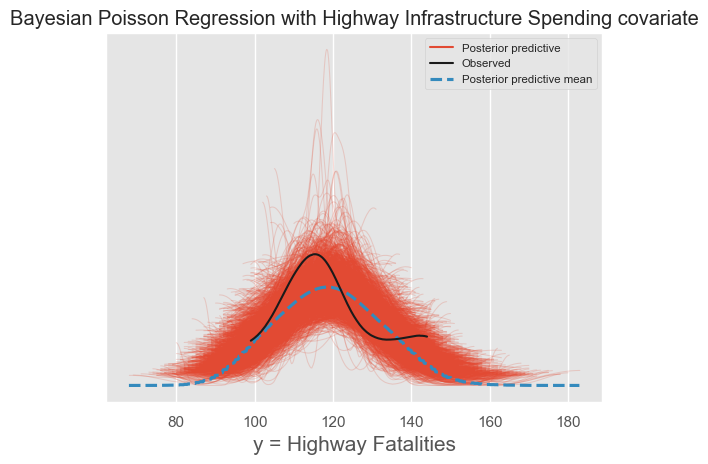

In [40]:
with poisson_model:
    poisson_ppc = pm.sample_posterior_predictive(trace_poisson)
    poisson_ppc['y'] = poisson_ppc['y'] + 0.0
    ppc_poisson = az.from_pymc3(trace_poisson, posterior_predictive=poisson_ppc)
        
# Plot PPC samples

az.plot_ppc(ppc_poisson)
plt.xlabel('y = Highway Fatalities')
plt.title('Bayesian Poisson Regression with Highway Infrastructure Spending covariate')
# plt.axis([-2, 45, -0.01, 0.2])

plt.show()

In [41]:
with pm.Model() as simple_bayes_model:
    mu = pm.Gamma('mu', alpha=10, beta=1)
    counts = pm.Poisson('C', mu=mu, observed=model_test.fatalities)
    simple_trace_poisson = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag')

/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


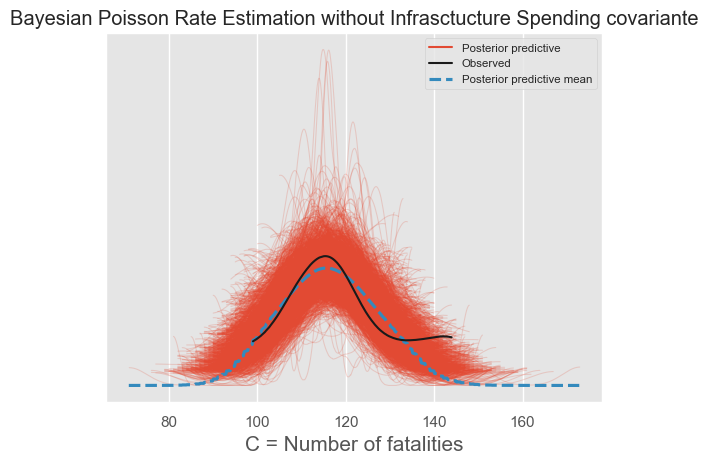

In [42]:
with simple_bayes_model:
        simple_bayes_ppc = pm.sample_posterior_predictive(simple_trace_poisson)
        simple_bayes_ppc['C'] = simple_bayes_ppc['C'] + 0.0

ppc_data = az.from_pymc3(simple_trace_poisson, posterior_predictive=simple_bayes_ppc)
az.plot_ppc(ppc_data)
plt.xlabel('C = Number of fatalities')
plt.title('Bayesian Poisson Rate Estimation without Infrasctucture Spending covariante')
plt.show()